In [1]:
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
all_data = pd.read_csv('./clean.csv', encoding='unicode_escape')
all_data.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,1,2010-02-05,24924.50,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,A,151315
1,2,1,1,2010-02-12,46039.49,1,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,A,151315
2,3,1,1,2010-02-19,41595.55,0,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,A,151315
3,4,1,1,2010-02-26,19403.54,0,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,A,151315
4,5,1,1,2010-03-05,21827.90,0,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,A,151315


In [3]:
data = pd.DataFrame()
data['ds'] = pd.to_datetime(all_data['Date'])
data['y'] = all_data['Fuel_Price']
data = data[:10000]

In [4]:
data

,ds,y
0,2010-02-05,2.572
1,2010-02-12,2.548
2,2010-02-19,2.514
3,2010-02-26,2.561
4,2010-03-05,2.625
...,...,...
9995,2011-07-08,3.480
9996,2011-07-15,3.575
9997,2011-07-22,3.651
9998,2011-07-29,3.682


In [5]:
data['y']

0       2.572
1       2.548
2       2.514
3       2.561
4       2.625
        ...  
9995    3.480
9996    3.575
9997    3.651
9998    3.682
9999    3.684
Name: y, Length: 10000, dtype: float64

In [6]:
model = Prophet(interval_width=0.95)
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


([], <a list of 0 Text xticklabel objects>)

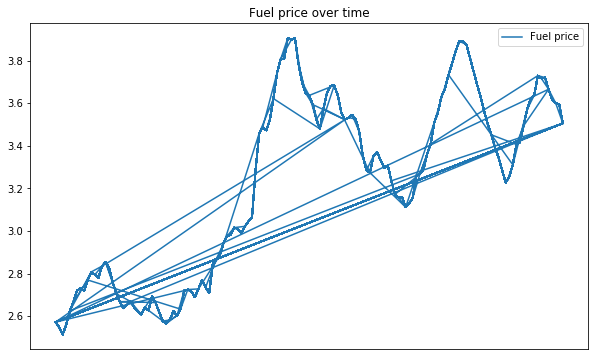

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data.set_index('ds'))
plt.legend(['Fuel price'])
plt.title("Fuel price over time")
plt.xticks([])

In [13]:
future_365 = model.make_future_dataframe(periods=365)
forecast_365 = model.predict(future_365)

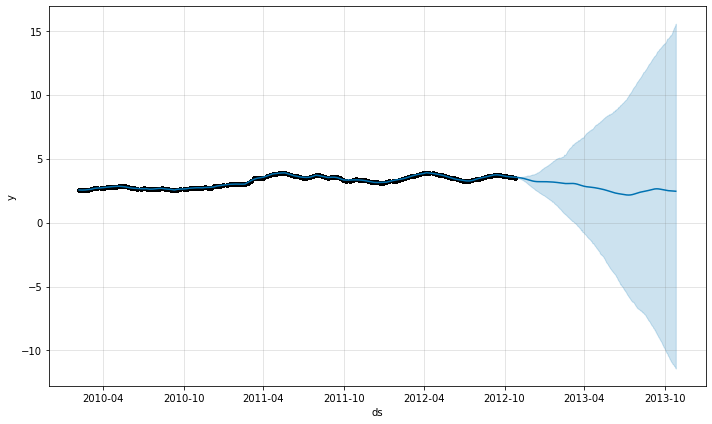

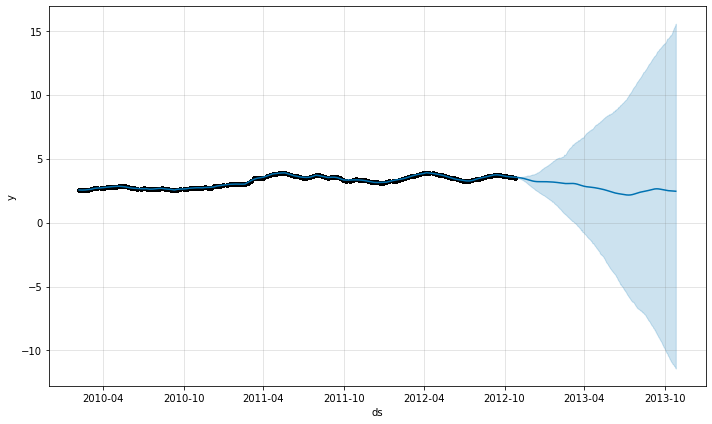

In [11]:
model.plot(forecast_365)

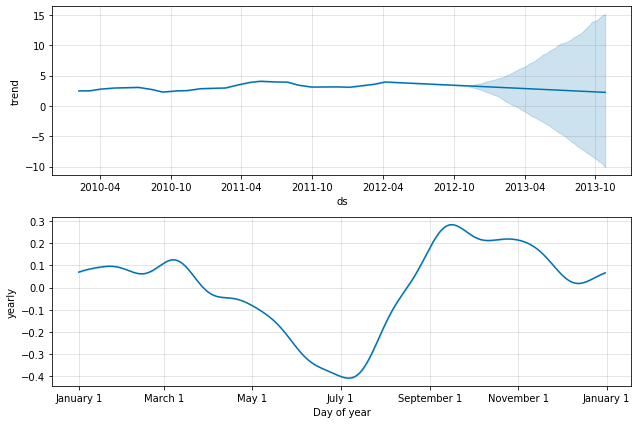

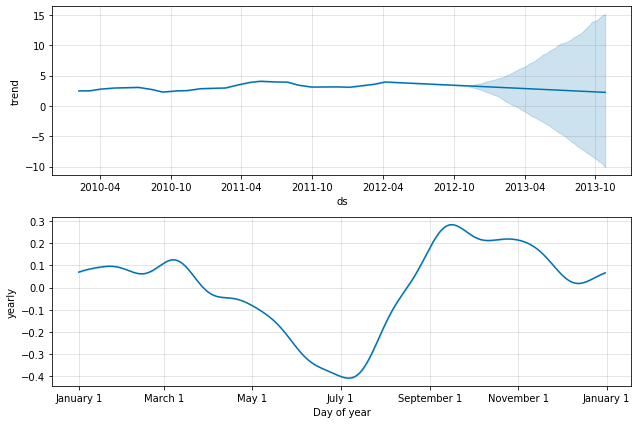

In [14]:
model.plot_components(forecast_365)

In [18]:
future_90 = model.make_future_dataframe(periods=90)
forecast_90 = model.predict(future_90)

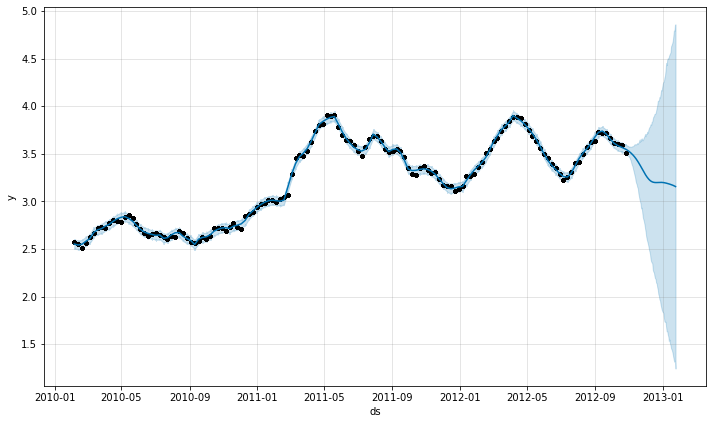

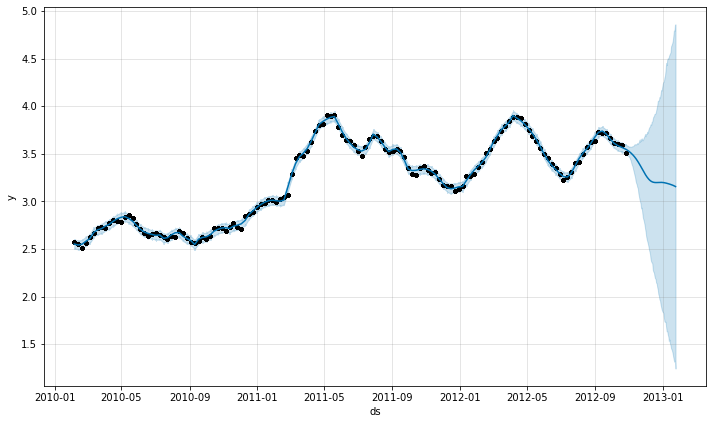

In [19]:
model.plot(forecast_90)

In [20]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='30 days', horizon = '200 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2012-02-09 00:00:00 and 2012-04-09 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-02-10,3.37423,3.319782,3.428607,3.409,2012-02-09
1,2012-02-10,3.37423,3.318538,3.425319,3.409,2012-02-09
2,2012-02-10,3.37423,3.319940,3.435206,3.409,2012-02-09
3,2012-02-10,3.37423,3.322083,3.425126,3.409,2012-02-09
4,2012-02-10,3.37423,3.315995,3.430403,3.409,2012-02-09


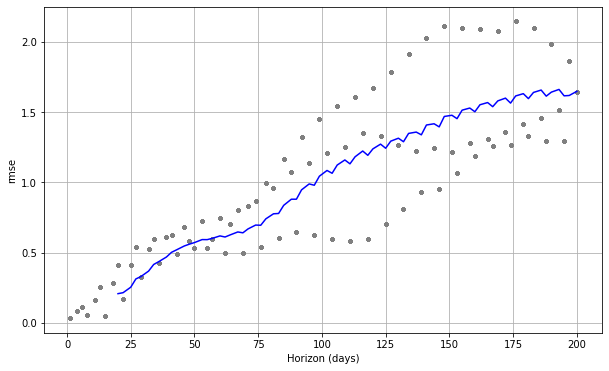

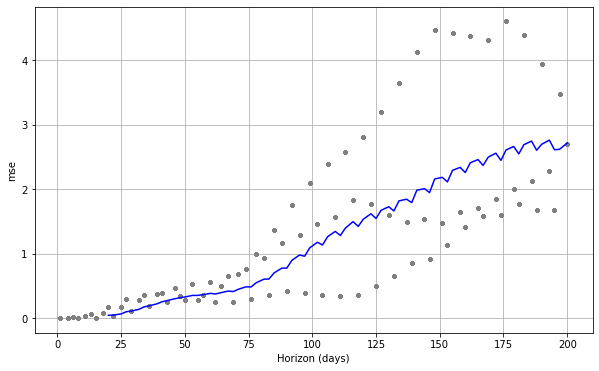

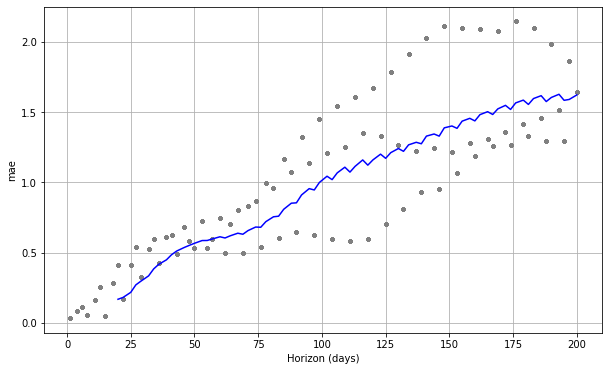

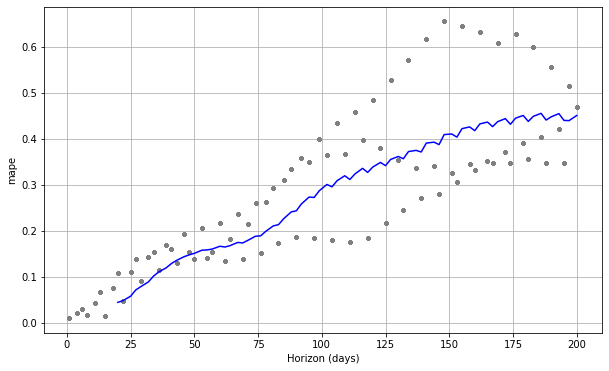

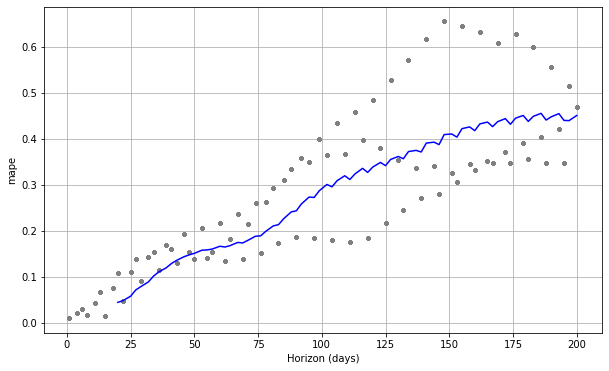

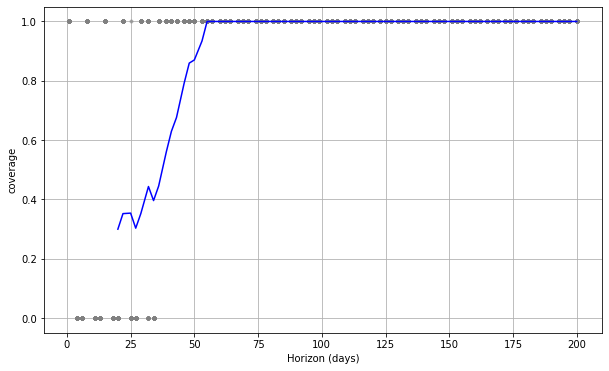

In [21]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
fig = plot_cross_validation_metric(df_cv, metric='mse')
fig = plot_cross_validation_metric(df_cv, metric='mae')
fig = plot_cross_validation_metric(df_cv, metric='mape')
fig = plot_cross_validation_metric(df_cv, metric='mape')
fig = plot_cross_validation_metric(df_cv, metric='coverage')